# Set-Up the Notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Config

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [4]:
# Loading the Dataset

data = pd.read_csv(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\data\raw\loan_approval_dataset.csv")
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
data = data.drop("loan_id", axis = 1)

# Understanding the Dataset

In [6]:
# Shape of the data
print(f"Total No. of Rows: {data.shape[0]}")
print(f"Total No. of Columns: {data.shape[1]}")

Total No. of Rows: 4269
Total No. of Columns: 12


In [7]:
# Cleaning Extra spaces in Column Names
data.columns = data.columns.str.strip()

In [8]:
# Name of the columns
print(f"Columns Names: \n\n{data.columns.tolist()}")

Columns Names: 

['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


In [9]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [10]:
# Summary Statistics

data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
# Checking for duplicates
print(f"Sum of duplicates: {data.duplicated().sum()}")

Sum of duplicates: 0


In [12]:
# Checking for Null Values
print(data.isnull().sum())

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


# Feature Engineering

In [13]:
data = data.set_axis(['no_of_dependents', 'education', "self_employed", "annual_income_in_lakhs", "loan_amount_in_lakhs",
                  "loan_term_in_months", "cibil_score", "residential_assets_value", "commercial_assets_value",
                 "luxury_assets_value", "bank_asset_value", "loan_status"], axis=1)

In [14]:
def lakhs(value):
    return value/100000

amount_col = ["annual_income_in_lakhs", "loan_amount_in_lakhs", "residential_assets_value", "commercial_assets_value",
                 "luxury_assets_value", "bank_asset_value"]

for col in amount_col:
    data[col] = data[col].apply(lakhs)

In [15]:
def loan_income_ratio(value1, value2):
    return value2/value1

data["debt_to_income_ratio"] = loan_income_ratio(data["annual_income_in_lakhs"], data["loan_amount_in_lakhs"])

In [16]:
def cibil_class(value):
    if value in range(300, 600):
        return "Low"
    elif value in range(601, 699):
        return "Fair"
    elif value in range(700, 799):
        return  "Good"
    else:
        return "Excellent"

data["cibil_score"] = data["cibil_score"].apply(cibil_class)

In [17]:
data["Asset_Score_in_lakhs"] = data["residential_assets_value"] + data["commercial_assets_value"] + data["luxury_assets_value"] + data["bank_asset_value"]

In [18]:
data = data.drop(columns = ["residential_assets_value", "commercial_assets_value",
                 "luxury_assets_value", "bank_asset_value"], axis = 1)

In [19]:
data.head()

,no_of_dependents,education,self_employed,annual_income_in_lakhs,loan_amount_in_lakhs,loan_term_in_months,cibil_score,loan_status,debt_to_income_ratio,Asset_Score_in_lakhs
0,2,Graduate,No,96.0,299.0,12,Good,Approved,3.114583,507.0
1,0,Not Graduate,Yes,41.0,122.0,8,Low,Rejected,2.975610,170.0
2,3,Graduate,No,91.0,297.0,20,Low,Rejected,3.263736,577.0
3,3,Graduate,No,82.0,307.0,8,Low,Rejected,3.743902,527.0
4,5,Not Graduate,Yes,98.0,242.0,20,Low,Rejected,2.469388,550.0


# Explore the Target Variable 

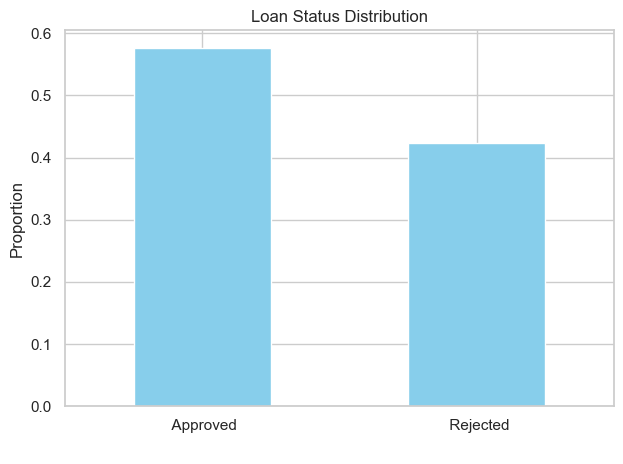

In [23]:
data["loan_status"].value_counts(normalize=True).plot(kind = "bar", color = "skyblue")
plt.title("Loan Status Distribution")
plt.xticks(rotation=360)
plt.ylabel("Proportion")
plt.xlabel(" ")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\loan_status_distribution.png")
plt.show()

# Visualize Key Features

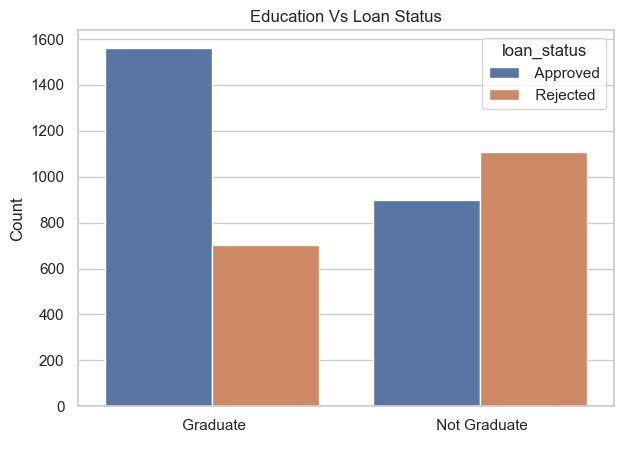

In [24]:
sns.countplot(x="education", hue="loan_status", data = data)
plt.title("Education Vs Loan Status")
plt.xticks(rotation=360)
plt.xlabel(" ")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Education_vs_Loan_Status.png")
plt.show()

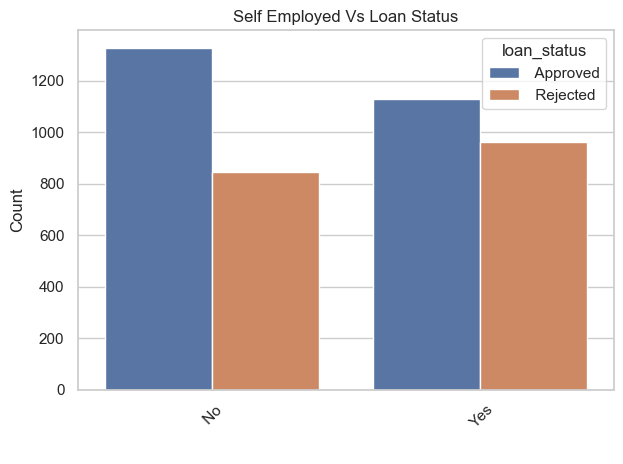

In [25]:
sns.countplot(x="self_employed", hue="loan_status", data = data)
plt.title("Self Employed Vs Loan Status")
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Self_Employed_vs_Loan_Status.png")
plt.show()

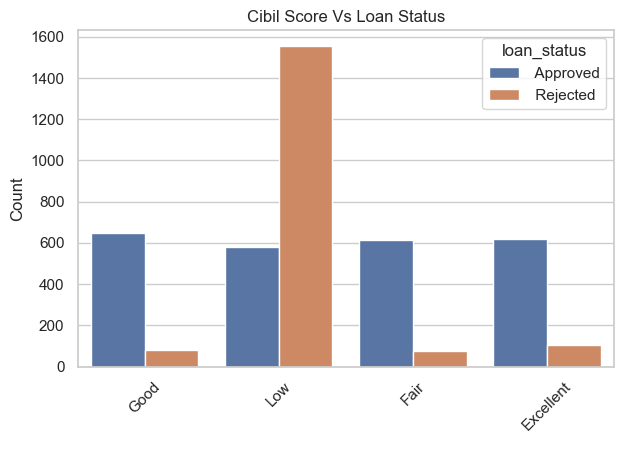

In [26]:
sns.countplot(x="cibil_score", hue="loan_status", data = data)
plt.title("Cibil Score Vs Loan Status")
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Cibil_Score_vs_Loan_Status.png")
plt.show()

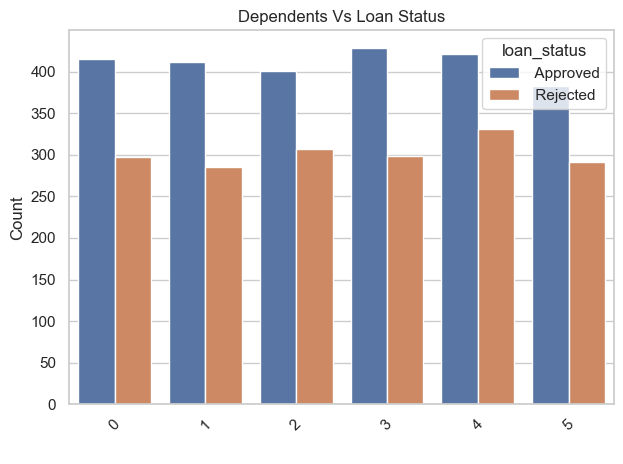

In [27]:
sns.countplot(x="no_of_dependents", hue="loan_status", data = data)
plt.title("Dependents Vs Loan Status")
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Dependents_vs_Loan_Status.png")
plt.show()

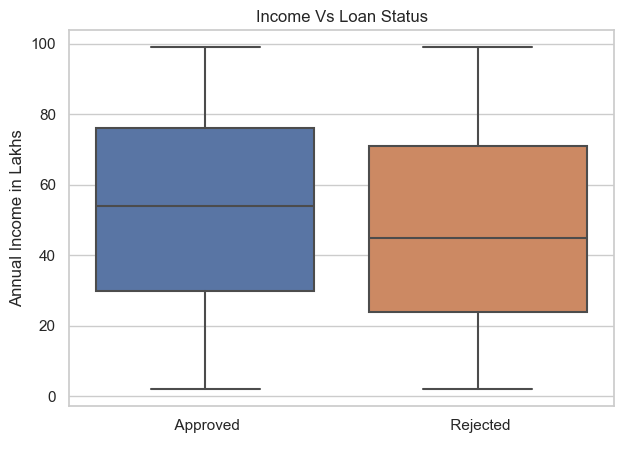

In [28]:
sns.boxplot(x = "loan_status", y = "annual_income_in_lakhs", data = data)
plt.title("Income Vs Loan Status")
plt.xlabel(" ")
plt.ylabel("Annual Income in Lakhs")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Income_Vs_Loan_Status.png")
plt.show()

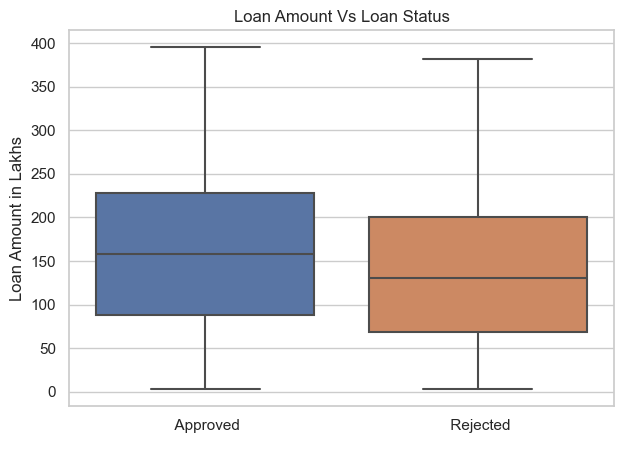

In [29]:
sns.boxplot(x = "loan_status", y = "loan_amount_in_lakhs", data = data)
plt.title("Loan Amount Vs Loan Status")
plt.xlabel(" ")
plt.ylabel("Loan Amount in Lakhs")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Loan_Amount_Vs_Loan_Status.png")
plt.show()

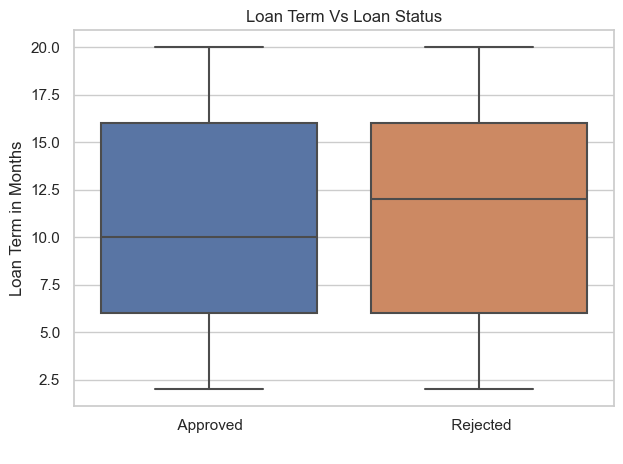

In [30]:
sns.boxplot(x = "loan_status", y = "loan_term_in_months", data = data)
plt.title("Loan Term Vs Loan Status")
plt.xlabel(" ")
plt.ylabel("Loan Term in Months")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Loan_Term_Vs_Loan_Status.png")
plt.show()

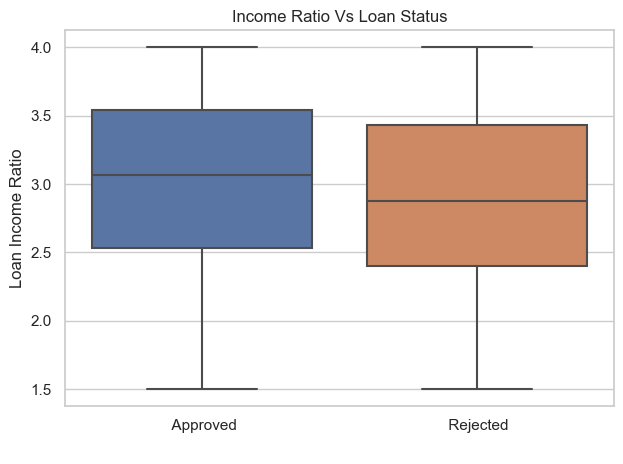

In [31]:
sns.boxplot(x = "loan_status", y = "debt_to_income_ratio", data = data)
plt.title("Income Ratio Vs Loan Status")
plt.xlabel(" ")
plt.ylabel("Loan Income Ratio")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Income_Ratio_Vs_Loan_Status.png")
plt.show()

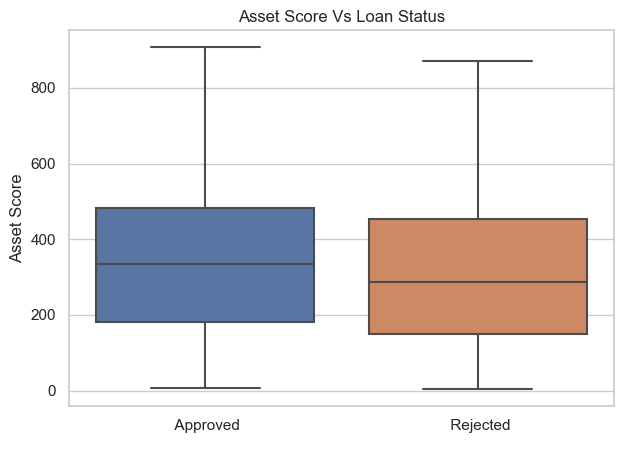

In [32]:
sns.boxplot(x = "loan_status", y = "Asset_Score_in_lakhs", data = data)
plt.title("Asset Score Vs Loan Status")
plt.xlabel(" ")
plt.ylabel("Asset Score")
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Asset_Score_Vs_Loan_Status.png")
plt.show()

# Correlation Matrix

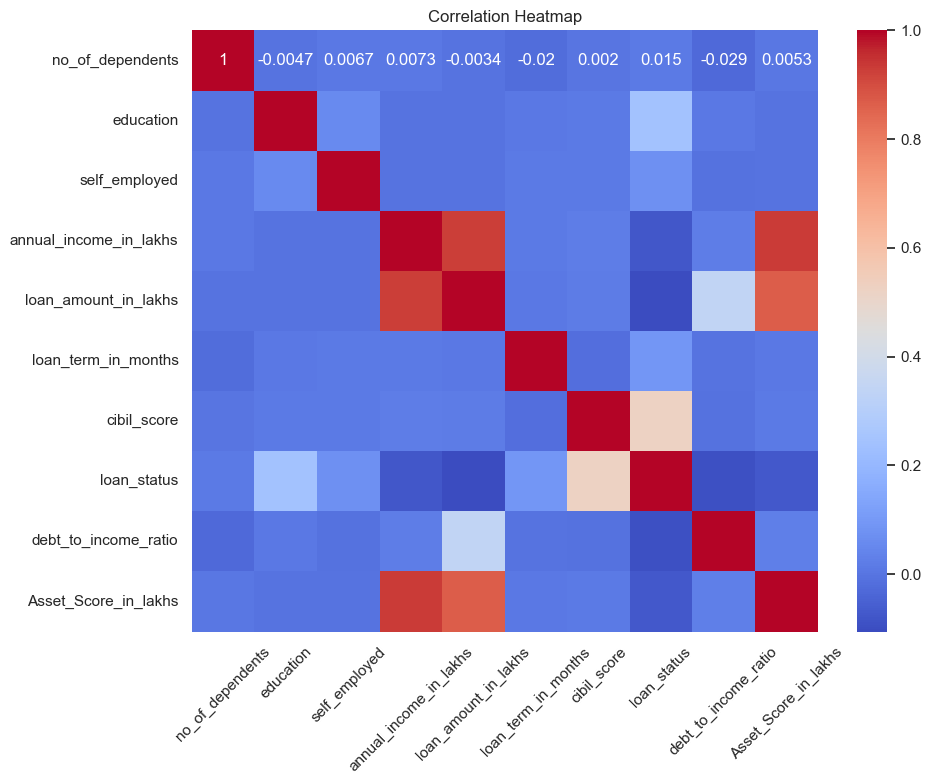

In [33]:
# Encode categorical features temporarily
data_encoded = data.copy()
for col in data_encoded.select_dtypes(include='object').columns:
    data_encoded[col] = data_encoded[col].astype('category').cat.codes

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig(r"C:\Users\Deepak Verma\OneDrive\Documents\Loan_Default_Prediction\outputs\figures\Correlation_Heatmap.png")
plt.show()